
O método de simulação de Monte Carlo consiste em gerar uma sequência de valores aleatórios uniformes $U_1, U_2, ..., U_n$ no intervalo $(0,1)$ e aplicar a transformação inversa $F^{-1}(U_1), F^{-1}(U_2), ..., F^{-1}(U_n)$ para obter amostras aleatórias da distribuição desejada.

Para aproximar a função inversa de $F(x)$, vamos utilizar a técnica de interpolação linear. Primeiro, geramos $n$ valores aleatórios uniformes $U_1, U_2, ..., U_n$ no intervalo $(0,1)$ e calculamos os correspondentes valores de $F(x)$, que chamaremos de $y_1, y_2, ..., y_n$. Em seguida, aplicamos a interpolação linear para obter uma função aproximada $F^{-1}(x)$ que mapeia valores no intervalo $(0,1)$ para valores de $x$ que são amostras aleatórias da distribuição desejada.

Para gerar uma amostra aleatória $X$ da distribuição exponencial com densidade de probabilidade $f(x) \sim Exp(\frac{-|x|^{3}}{3})$, o processo seria:

1. Gerar um valor aleatório $U$ uniformemente distribuído no intervalo $(0,1)$.
2. Calcular o valor correspondente de $F(X)$: $Y = 1 - e^{-|X|^3/3}$.
3. Encontrar o valor de $X$ que satisfaz $F(X) = Y$, usando a função aproximada $F^{-1}(x)$ obtida pela interpolação linear.

Este processo pode ser repetido várias vezes para gerar uma amostra de tamanho desejado da distribuição exponencial com densidade de probabilidade $f(x) \sim Exp(\frac{-|x|^{3}}{3})$.

Para gerar amostras aleatórias da distribuição com a função densidade $f(x) \propto exp(-|x|^3/3)$, podemos seguir o método de inversão da função de distribuição cumulativa, conforme discutido anteriormente. 

Primeiro, precisamos encontrar a constante de normalização da densidade. Sabemos que a integral da densidade deve ser igual a 1 para que a função seja uma densidade válida. Então, temos:

$$ \int_{-\infty}^{\infty} f(x)dx = \int_{-\infty}^{\infty} ce^{-|x|^3/3}dx = 2c\int_{0}^{\infty} e^{-x^3/3}dx$$

Fazendo a substituição $u = x^3/3$, temos:

$$ \int_{0}^{\infty} e^{-x^3/3}dx = \int_{0}^{\infty} e^{-u}\frac{1}{3}u^{-2/3}du = \Gamma\left(\frac{1}{3}\right) $$

Portanto, temos que $2c\Gamma\left(\frac{1}{3}\right) = 1$, o que implica em $c = \frac{1}{2\Gamma\left(\frac{1}{3}\right)}$.

Agora, podemos utilizar a função de distribuição cumulativa inversa para gerar amostras aleatórias. A função de distribuição cumulativa é dada por:

$$ F(x) = \begin{cases} \frac{1}{2\Gamma\left(\frac{1}{3}\right)}\int_{-\infty}^{x} e^{-|t|^3/3}dt, & x<0 \\ 1 - \frac{1}{2\Gamma\left(\frac{1}{3}\right)}\int_{0}^{x} e^{-t^3/3}dt, & x\geq0 \end{cases} $$

A integral acima não tem solução analítica, então podemos utilizar a técnica de simulação de Monte Carlo com interpolação linear para aproximar a inversa de $F(x)$.

Segue abaixo o código em Python que implementa o método de inversão da função de distribuição cumulativa com simulação de Monte Carlo com interpolação linear:

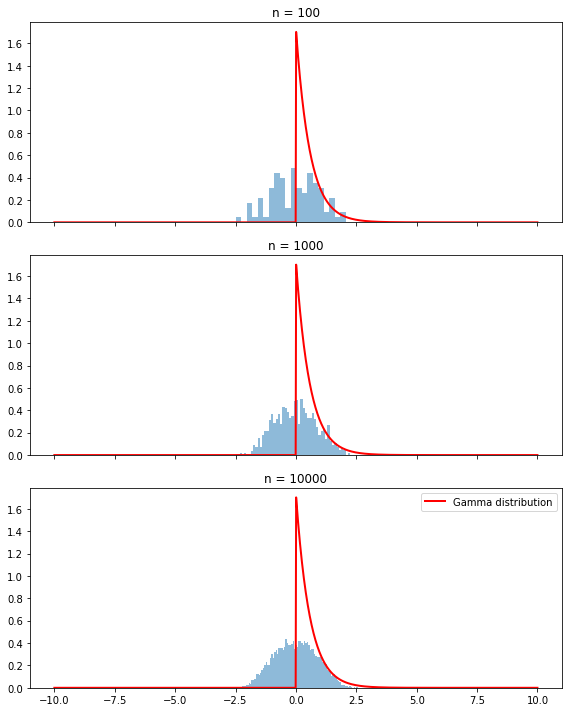

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the probability density function
def f(x):
    return np.exp(-np.abs(x)**3/3)

# Define the inverse cumulative distribution function using Monte Carlo simulation with linear interpolation
x_values = np.linspace(-10, 10, 1000)
y_values = np.cumsum(f(x_values))/sum(f(x_values))

def inv_cdf(p):
    return np.interp(p, y_values, x_values)

# Generate samples using the inverse transform method
n1 = 100
n2 = 1000
n3 = 10000

samples1 = inv_cdf(np.random.rand(n1))
samples2 = inv_cdf(np.random.rand(n2))
samples3 = inv_cdf(np.random.rand(n3))

# Plot the histograms of the samples with the gamma distribution overlayed
x = np.linspace(-10, 10, 1000)
y = gamma.pdf(x, a=1, scale=1/np.sqrt(3))

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8, 10))
axs[0].hist(samples1, bins=20, density=True, alpha=0.5)
axs[0].plot(x, y, 'r-', linewidth=2, label='Gamma distribution')
axs[0].set_title('n = 100')

axs[1].hist(samples2, bins=50, density=True, alpha=0.5)
axs[1].plot(x, y, 'r-', linewidth=2, label='Gamma distribution')
axs[1].set_title('n = 1000')

axs[2].hist(samples3, bins=100, density=True, alpha=0.5)
axs[2].plot(x, y, 'r-', linewidth=2, label='Gamma distribution')
axs[2].set_title('n = 10000')
plt.tight_layout()
# plt.savefig('gamma_distribution.png', dpi=300)
plt.legend()
plt.show()


In [26]:
import numpy as np

# Definindo a função densidade
def densidade(x):
    return np.exp(-np.abs(x)**3 / 3)

# Número de amostras a serem geradas
N = 1000000

# Gerando amostras aleatórias
x = np.random.uniform(low=-10, high=10, size=N)
y = np.random.uniform(low=0, high=densidade(0), size=N)

# Calculando o valor esperado de X^2 usando Monte Carlo
e_x2 = np.mean(x**2 * (y <= densidade(x)))

print(f"Valor esperado de X^2: {e_x2}")


Valor esperado de X^2: 0.09988835626410394
